# Song Popularity Prediction

**Task:** Predict whether a song is popular or not based on audio features.

<a id="table-of-contents"></a>
## Table of Contents
1. [Preparations](#preparations)
    1. [Import Libraries](#import-libraries)
    2. [Load Data](#load-data)
    3. [Custom Functions](#custom-functions)
2. [Exploratory Data Analysis](#-data-analysis)
    1. [Dataset Overview: structure and data](#dataset-overview)
        1. [Train Set](#1-train-set)
        2. [Test Set](#1-test-set)
    2. [Target Variable](#target-variable)
    3. [Feature Analysis](#feature-analysis)
        1. [Feature Distributions](#feature-distributions)
            1. [Deep Dive: Instrumentalness](#deep-dive-instrumentalness)
        2. [Target Impact](#target-impact)
        3. [Correlation Analysis](#correlation-analysis)
        4. [Feature Interactions](#feature-interactions)

<a id="preparations"></a>
## **1.** Preparations

[Back to Table of Contents](#table-of-contents)

<a id="import-libraries"></a>
### **1.A.** Import Libraries

[Back to Table of Contents](#table-of-contents)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

<a id="load-data"></a>
### **1.B.** Load Data

[Back to Table of Contents](#table-of-contents)

In [2]:
train = pd.read_csv('./data/original/train.csv', index_col='id')
test = pd.read_csv('./data/original/test.csv', index_col='id')

<a id="exploratory-data-analysis"></a>
## **2.** Exploratory Data Analysis

[Back to Table of Contents](#table-of-contents)

<a id="dataset-overview"></a>
### **2.A.** Dataset Overview: structure and data

[Back to Table of Contents](#table-of-contents)

Both the train and test datasets contain the same columns describing *Audio Features*, except for **song_popularity** which is the target variable present only in the train dataset.

The following descriptions of each of these features are available on Spotify's API Dev Documentation: [Reference Guide](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features).

<br>

> **id**
> 
> _string_
> 
> The Spotify ID for the track.

<br>

> **song_duration_ms**
> 
> _integer_
> 
> The duration of the track in milliseconds.

<br>

> **acousticness** 
> 
> _number (float)_
> 
> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

<br>

> **danceability**
> 
> _number (float)_
> 
> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

<br>

> **energy**
> 
> _number (float)_
> 
> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

<br>

> **instrumentalness**
> 
> _number (float)_
> 
> Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

<br>

> **key**
> 
> _integer_
> 
> The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

<br>

> **liveness**
> 
> _number (float)_
> 
> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

<br>

> **loudness**
> 
> _number (float)_
> 
> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

<br>

> **audio_mode**
> 
> _integer_
> 
> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

<br>

> **speechiness**
> 
> _number (float)_
> 
> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

<br>

> **tempo**
> 
> _number (float)_
> 
> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

<br>

> **time_signature**
> 
> _integer_
> 
> An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

<br>

> **audio_valence**
> 
> _number (float)_
> 
> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

<a id="1-train-set"></a>
#### **2.A.a.** Train Set

[Back to Table of Contents](#table-of-contents)

In [3]:
print('Train size: ', len(test), ' rows.')
print('Columns: ', train.shape[1])
train.head()

Train size:  10000  rows.
Columns:  14


song_duration_ms  acousticness  danceability    energy  instrumentalness  \
id                                                                             
0           212990.0      0.642286      0.856520  0.707073          0.002001   
1                NaN      0.054866      0.733289  0.835545          0.000996   
2           193213.0           NaN      0.188387  0.783524         -0.002694   
3           249893.0      0.488660      0.585234  0.552685          0.000608   
4           165969.0      0.493017           NaN  0.740982          0.002033   

     key  liveness  loudness  audio_mode  speechiness       tempo  \
id                                                                  
0   10.0       NaN -5.619088           0     0.082570  158.386236   
1    8.0  0.436428 -5.236965           1     0.127358  102.752988   
2    5.0  0.170499 -4.951759           0     0.052282  178.685791   
3    0.0  0.094805 -7.893694           0     0.035618  128.715630   
4   10.0  0.094891 -2.684095           0     0.050746  121.928157   

    time_signature  audio_valence  song_popularity  
id                                                  
0                4       0.734642                0  
1                3       0.711531                1  
2                3       0.425536                0  
3                3       0.453597                0  
4                4       0.741311                0

In [4]:
def dataset_stats(df):
    """
    Generates a summary of basic statistics based on a dataframe using numeric columns.
    
    The statistics include:
        - dtype: column dtype
        - row #: number of rows in column.
        - null #: number of null values in column.
        - null %: percentage of null values in column.
        - mean: arithmetic mean of column values.
        - std: standard deviation of column values.
        - min: minimum value of column.
        - Q1: first quantile of column (25%).
        - Q2: second quantile of column (50%) or median.
        - Q3: third quantile of column (75%).
        - max: maximum value of column.
    ---------------
    Args:
        df (pandas.DataFrame): DataFrame to use as a basis for the summary.
    ---------------
    Returns:
        pandas.DataFrame: summary statistics.
    """

    numeric_cols = list(df.select_dtypes(include=np.number).columns)

    stats = pd.DataFrame(columns=numeric_cols,
                         index=[
                             'dtype', 'row #', 'null #', 'null %', 'mean',
                             'unique #', 'std', 'min', 'Q1', 'Q2', 'Q3', 'max'
                         ])

    for col in numeric_cols:

        stats.loc['dtype', col] = df[col].dtype
        stats.loc['row #', col] = df[col].shape[0]
        stats.loc['null #', col] = df[col].isnull().sum()
        stats.loc['null %', col] = df[col].isnull().sum() / df[col].shape[0]
        stats.loc['unique #', col] = df[col].nunique()
        stats.loc['mean', col] = df[col].mean()
        stats.loc['std', col] = df[col].std()
        stats.loc['min', col] = df[col].min()
        stats.loc['Q1', col] = df[col].quantile(q=0.25)
        stats.loc['Q2', col] = df[col].quantile(q=0.5)
        stats.loc['Q3', col] = df[col].quantile(q=0.75)
        stats.loc['max', col] = df[col].max()

    cell_hover = {  # for row hover use <tr> instead of <td>
        'selector': 'td:hover',
        'props': [('background-color', '#ffffb3'), ('color', '#000000')]
    }
    index_names = {
        'selector': '.index_name',
        'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
    }
    headers = {
        'selector': 'th:not(.index_name)',
        'props': 'background-color: #000000; color: white;'
    }

    stats = stats.style\
                .format(formatter="{:.2%}",subset=pd.IndexSlice['null %', :])\
                .set_sticky(axis='index')\
                .set_table_styles([cell_hover, index_names, headers])

    return stats


In [5]:
dataset_stats(train)

In [6]:
# change dtypes for categorical variables
for var in ['key', 'audio_mode', 'time_signature']:
    train[var] = pd.Categorical(train[var])
train['song_popularity'] = train['song_popularity'].astype('bool').astype('category')

In [7]:
num_cols_size = train.select_dtypes(include=np.number).shape[1]
num_cols = list(train.select_dtypes(include=np.number).columns)
cat_cols_size = train.select_dtypes(exclude=np.number).shape[1]
cat_cols = list(train.select_dtypes(exclude=np.number).columns)
features = num_cols + cat_cols
features.remove('song_popularity')

print('Numerical columns: ', num_cols_size, ' | ',
      round(num_cols_size / train.shape[1] * 100, 0), '%')
print(num_cols, '\n')
print('Categorical columns: ', cat_cols_size, ' | ',
      round(cat_cols_size / train.shape[1] * 100, 0), '%')
print(cat_cols)


Numerical columns:  10  |  71.0 %
['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence'] 

Categorical columns:  4  |  29.0 %
['key', 'audio_mode', 'time_signature', 'song_popularity']


**Findings**
- All 14 columns are numerical and most of them show a range of continuous values, except for three of them which appear to be categorical: *key, audio_mode, time_signature*.
- 8 columns contain null values (*song_duration_ms*, *acousticness*, *danceability*, *energy*, *instrumentalness*, *key*, *liveness*, *loudness*)), most of them around 10%.
- Many features are bounded between values around 0 and 1: *acousticness*, *danceability*, *energy*, *liveness*, *speechiness* and *audio_valence*.
- Categorical features like *key*, *audio_mode* and *time_signature* are tightly related to musical concepts and could benefit from domain knowledge.

<a id="1-test-set"></a>
#### **2.A.b.** Test Set

[Back to Table of Contents](#table-of-contents)

The test dataset contains 10000 rows and the same features as the train set, except for the target variable (*song_popularity*).

In [8]:
print('Test size: ', len(test), ' rows.')
print('Columns: ', test.shape[1], ' | Missing columns from the training dataset: ', set(train.columns) - set(test.columns))

Test size:  10000  rows.
Columns:  13  | Missing columns from the training dataset:  {'song_popularity'}


### **2.B.** Target variable

[Back to Table of Contents](#table-of-contents)

The target variable (*song_popularity*) shows this is a binary classification task where there is an imbalance between the two classes:

Class  False :  63.56 % |  25424.0  examples
Class  True :  36.44 % |  14576.0  examples
Total examples:  40000


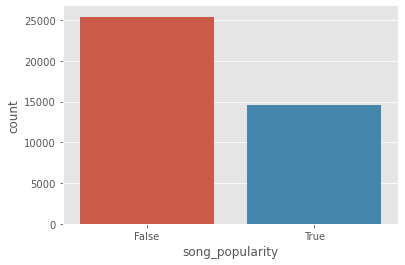

In [9]:
# classes - binary classification
for idx, val in train.song_popularity.value_counts(normalize=True).iteritems():
    print('Class ', idx, ': ', val * 100, '% | ', round(train.shape[0] * val, 0), ' examples')
print('Total examples: ', train.shape[0])


sns.countplot(data=train, x='song_popularity')
sns.despine()

This needs to be taken into account when splitting the training set into training and validation by stratifying on the target variable to preserve the proportions.

<a id="feature-analysis"></a>
### **2.C.** Feature Analysis

[Back to Table of Contents](#table-of-contents)

<a id="feature-distributions"></a>
#### **2.C.a.** Feature Distributions

[Back to Table of Contents](#table-of-contents)

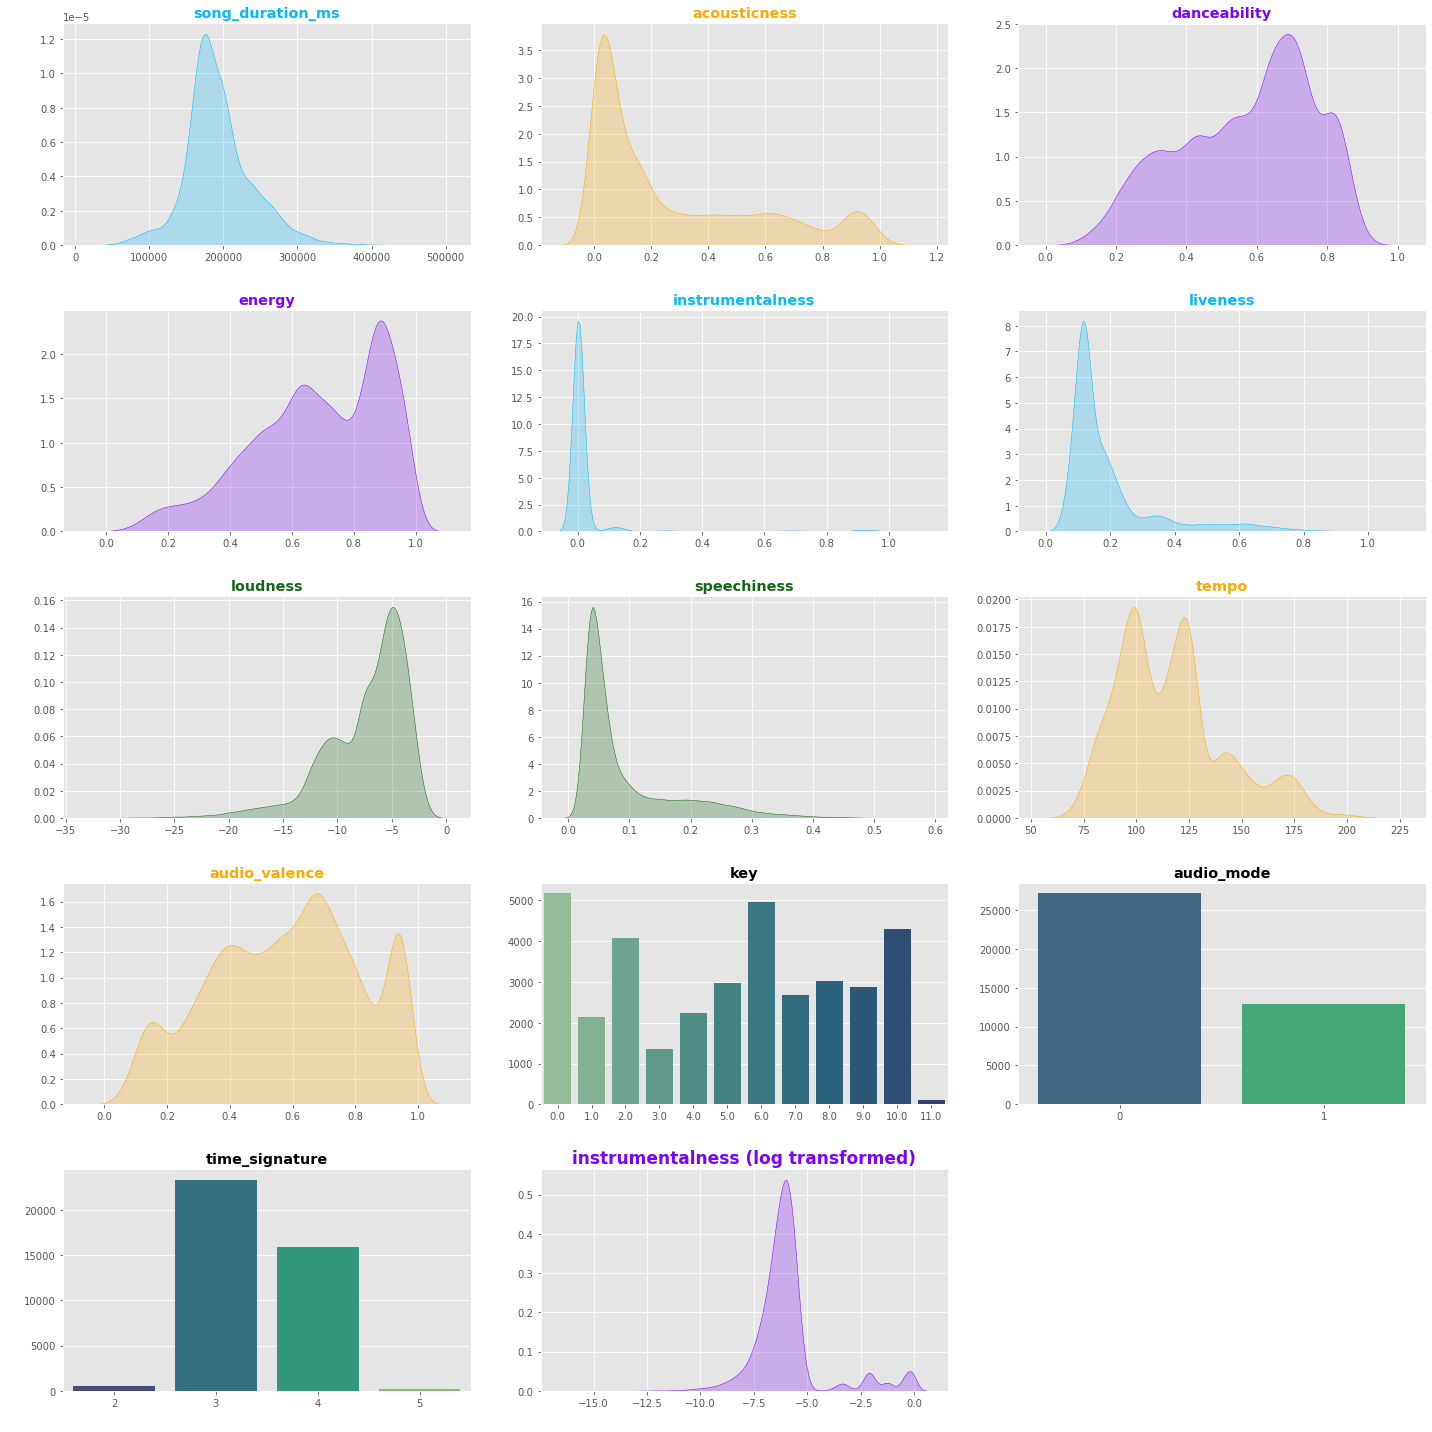

In [10]:
color_ = ['#7b03fc', '#0328fc', '#03bafc', '#136613', '#fca903', '#fc2803']
cmap_ = ['magma', 'viridis', 'crest']

plt.figure(figsize=(20, 20))
for i, col in enumerate(train[features].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(5, 3, i + 1)
    if col in num_cols:

        sns.kdeplot(train[col], color=rand_col, fill=rand_col)
        plt.title(col, weight='bold', color=rand_col)
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
    else:
        sns.countplot(data=train,
                      x=col,
                      palette=cmap_[random.sample(range(3), 1)[0]])
        plt.title(col, weight='bold', color='black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
plt.subplot(5, 3, 14)
sns.kdeplot(np.log(train['instrumentalness']), color=rand_col, fill=rand_col)
plt.title('instrumentalness (log transformed)',
          weight='bold',
          color=rand_col,
          size=17)
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plt.show()

**Findings**
- *Acousticness*, *liveness* and *speechiness* are skewed to the left, while *loudness* is skewed to the right.
- *Instrumentalness* shows a heavy left-skewed distribution, where even applying a log-transformation over the feature does not achieve a well-behaved shape.
- *Key*, *audio_mode* and *time_signature* are all categorica features.

<a id="deep-dive-instrumentalness"></a>
##### **2.C.a.i.** Deep dive: Instrumentalness

[Back to Table of Contents](#table-of-contents)

From the basic statistics drawn from the dataset, it is possible to see that 90% of the observations (decile 9) that make the *instrumentalness* variable are below 0.005, while the max value is above 1.

Therefore, using a threshold to divide the values could show insights into the heavily skewed distribution.

In [11]:
quantiles = pd.DataFrame(train.instrumentalness.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])).T
quantiles['min'] = train.instrumentalness.min()
quantiles['max'] = train.instrumentalness.max()
quantiles[['min', .1, .2, .3, .4, .5, .6, .7, .8, .9, 'max']]


min       0.1       0.2       0.3       0.4       0.5  \
instrumentalness -0.004398  0.000087  0.000707  0.001166  0.001572  0.001974   

                       0.6       0.7       0.8       0.9       max  
instrumentalness  0.002412  0.002911  0.003625  0.005721  1.075415

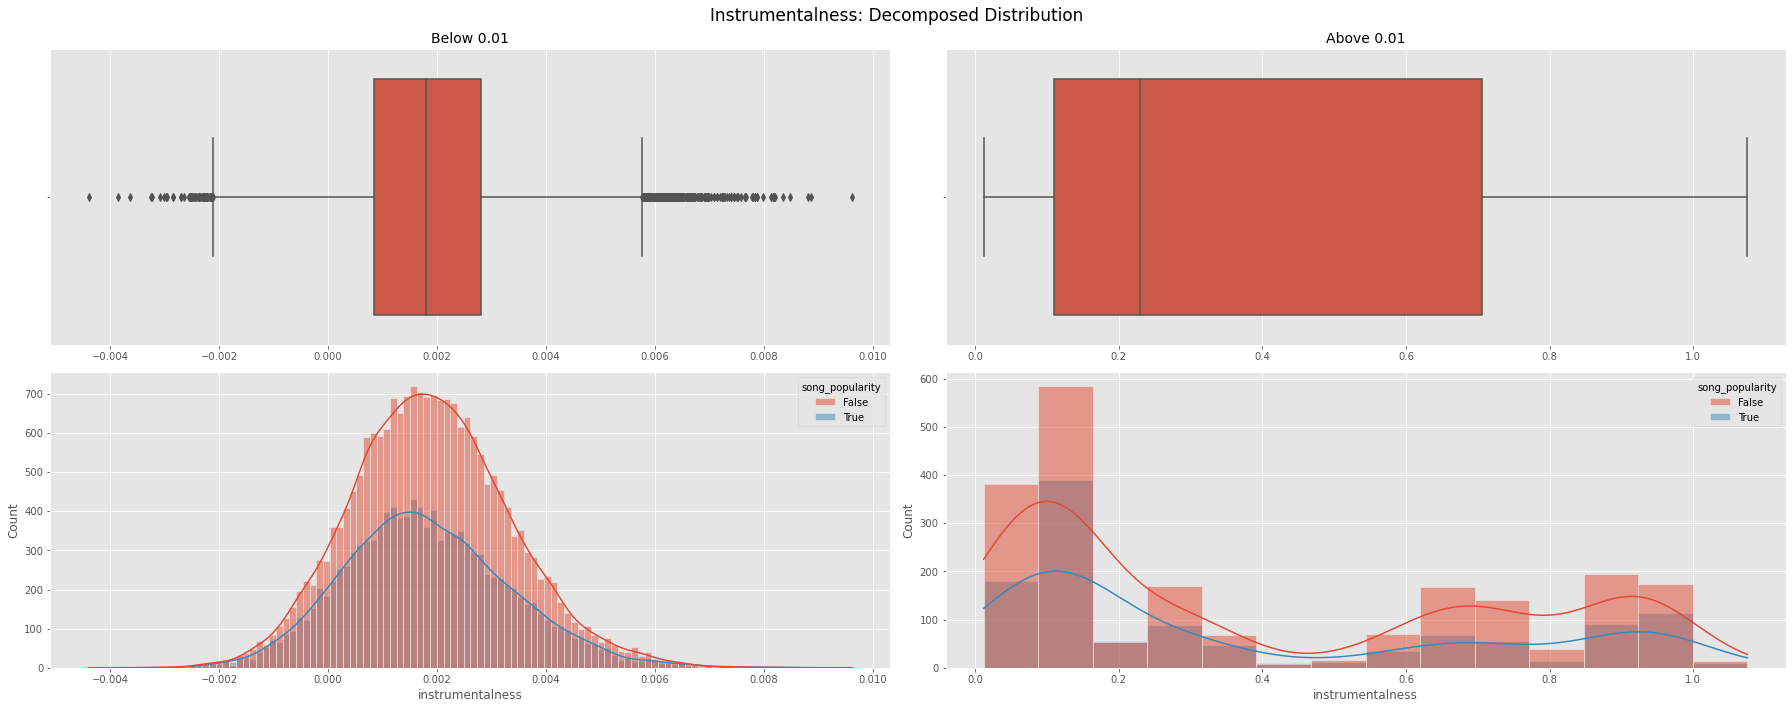

In [12]:
inst = train[['instrumentalness', 'song_popularity']].copy()
inst['thresh'] = inst.instrumentalness.map(lambda x: 'Above 0.01'
                                           if x > 0.01 else 'Below 0.01')

fig, axes = plt.subplots(2, 2, figsize=(25, 10))
for ncol, val in enumerate(['Below 0.01', 'Above 0.01']):
    sns.boxplot(data=inst[inst.thresh == val],
                x='instrumentalness',
                ax=axes[0, ncol]).set_title(val, fontsize=14)
    axes[0, ncol].set_xlabel('')
for ncol, val in enumerate(['Below 0.01', 'Above 0.01']):
    sns.histplot(data=inst[inst.thresh == val],
                 x='instrumentalness',
                 hue='song_popularity',
                 kde=True,
                 ax=axes[1, ncol])
plt.suptitle('Instrumentalness: Decomposed Distribution', fontsize=17)
plt.tight_layout()
plt.show()

**Findings**
- There are two distinct distributions within this feature.
- The values below 0.01, which amass above 90% of observations shows a rather symmetrical distribution centered slightly above zero with long tails, the lower one trailing slightly below zero. It resembles very closely in shape to a normal distribution.
- Values above the threshold show a distribution closely resembling other features, such as *acousticness*.
- Considering this, it might be useful to treat this feature in a special way to account for this particular status.

<a id="target-impact"></a>
#### **2.C.b.** Target Impact

[Back to Table of Contents](#table-of-contents)

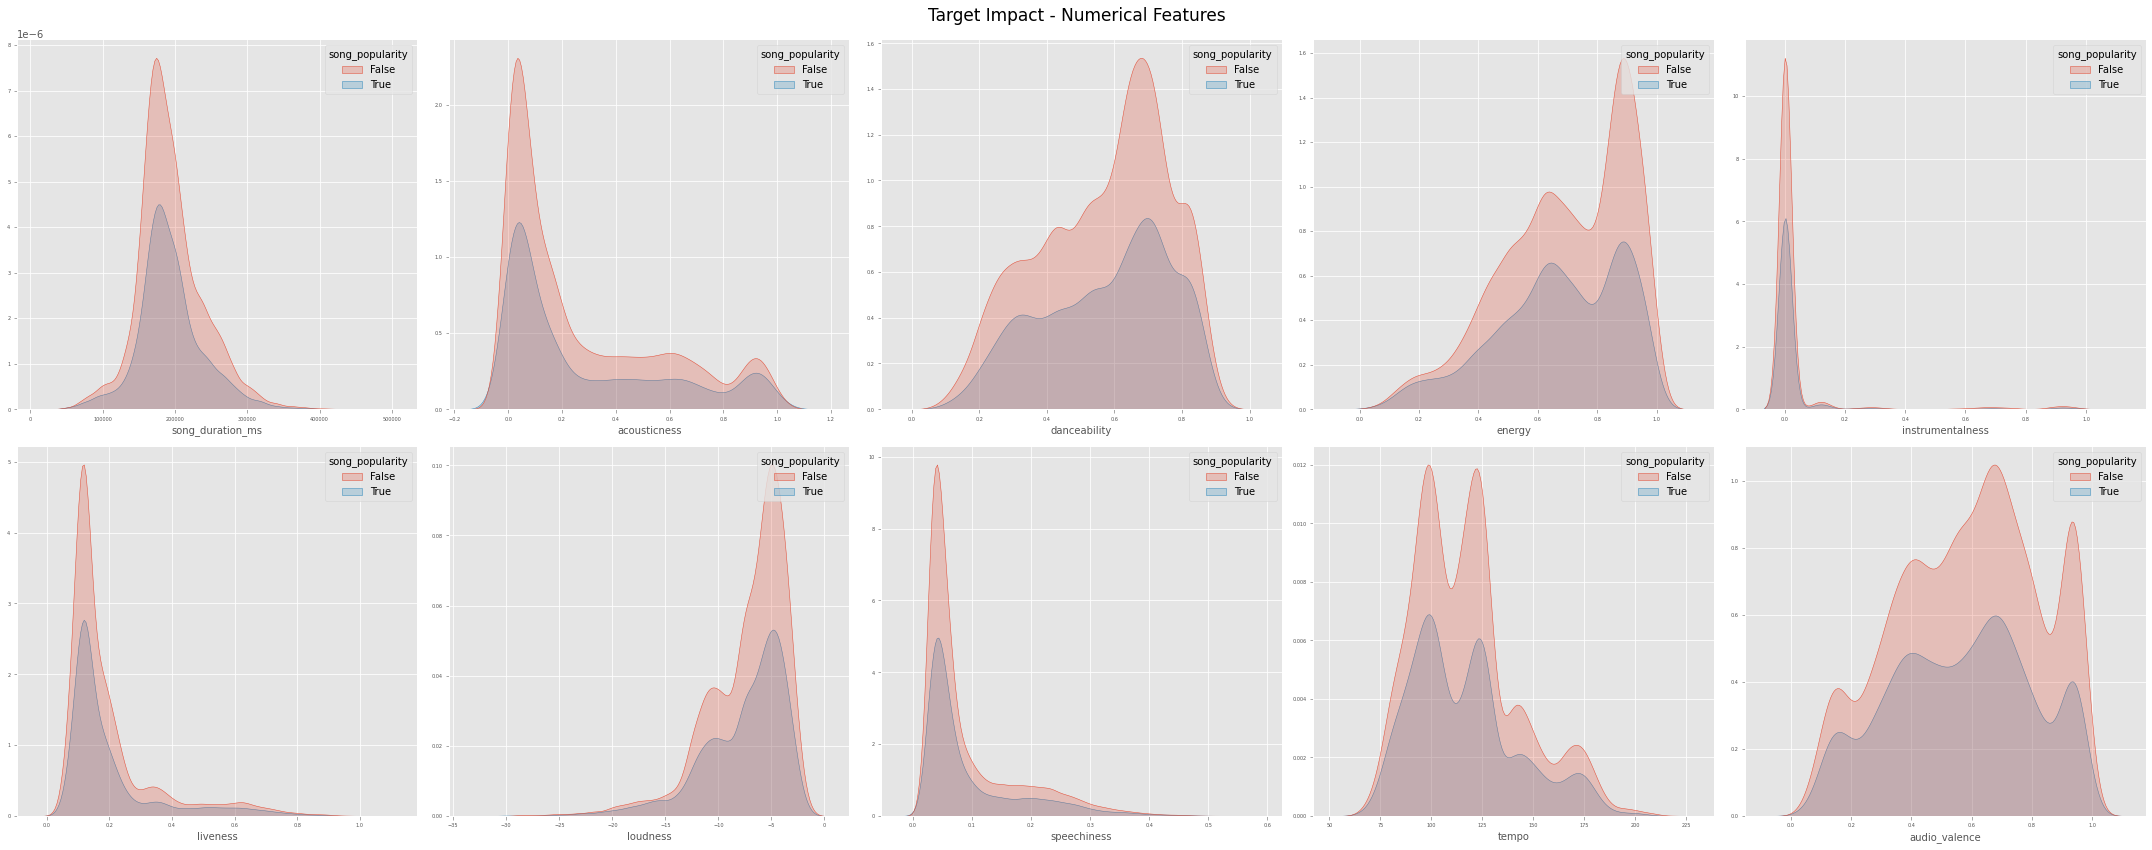

In [13]:
ncols = 5
nrows = 2

fig, ax = plt.subplots(nrows, ncols, figsize=(30,12))

for r in range(nrows):
    for c in range(ncols):
        col = num_cols[r*ncols+c]
        sns.kdeplot(data=train, x=col, hue='song_popularity', ax=ax[r,c], fill=True, legend=True)
        ax[r,c].set_ylabel('')
        ax[r,c].set_xlabel(col, fontsize=10)
        ax[r, c].tick_params(labelsize=5, width=0.5)
        sns.despine()
plt.suptitle('Target Impact - Numerical Features', fontsize=17)
plt.tight_layout()
plt.show()

**Findings**
- None of the features show a significant difference between the classes in the target variable. Popular and unpopular songs show a similar distribution across all features.

<a id="correlation-analysis"></a>
#### **2.C.c.** Correlation Analysis

[Back to Table of Contents](#table-of-contents)

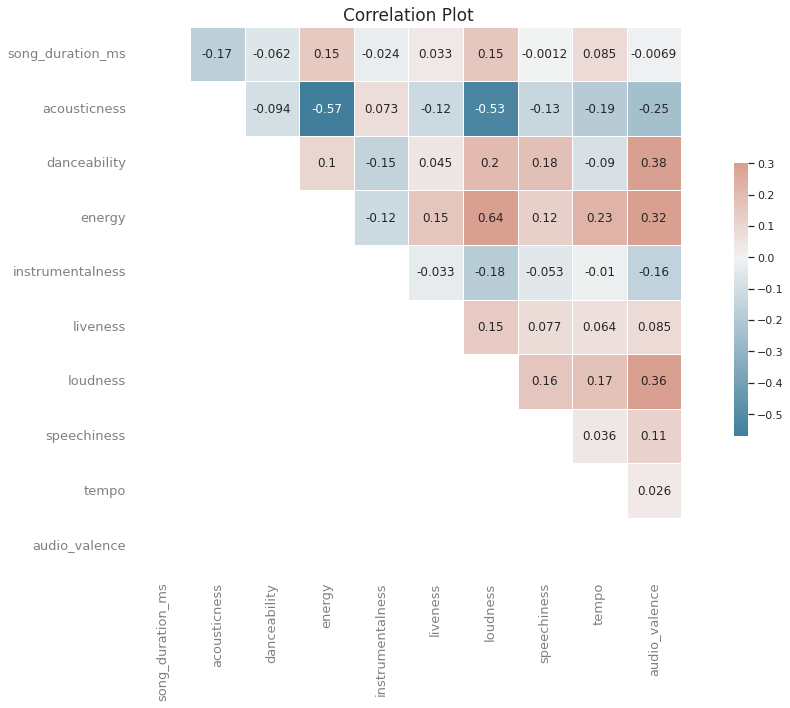

In [14]:
plt.figure(figsize=(15, 10))
corr_matrix = train.corr()
corr = np.tril(corr_matrix)

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})
sns.heatmap(data=corr_matrix.T,
            mask=corr,
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={
                "shrink": .5
            },
            annot=True).set_title('Correlation Plot', fontsize=17)
plt.xticks(size=13, color='grey')
plt.yticks(size=13, color='grey')
plt.tight_layout()
plt.show()

**Findings**
- None of the features share a strong correlation with song_popularity.
- There is a strong inverse correlation between acousticness vs energy and loudness respectively.
- At the same time, there is a strong direct correlation between energy and loudness.

<a id="feature-interactions"></a>
#### **2.C.d.** Feature Interactions

[Back to Table of Contents](#table-of-contents)

<Figure size 1440x1440 with 0 Axes>

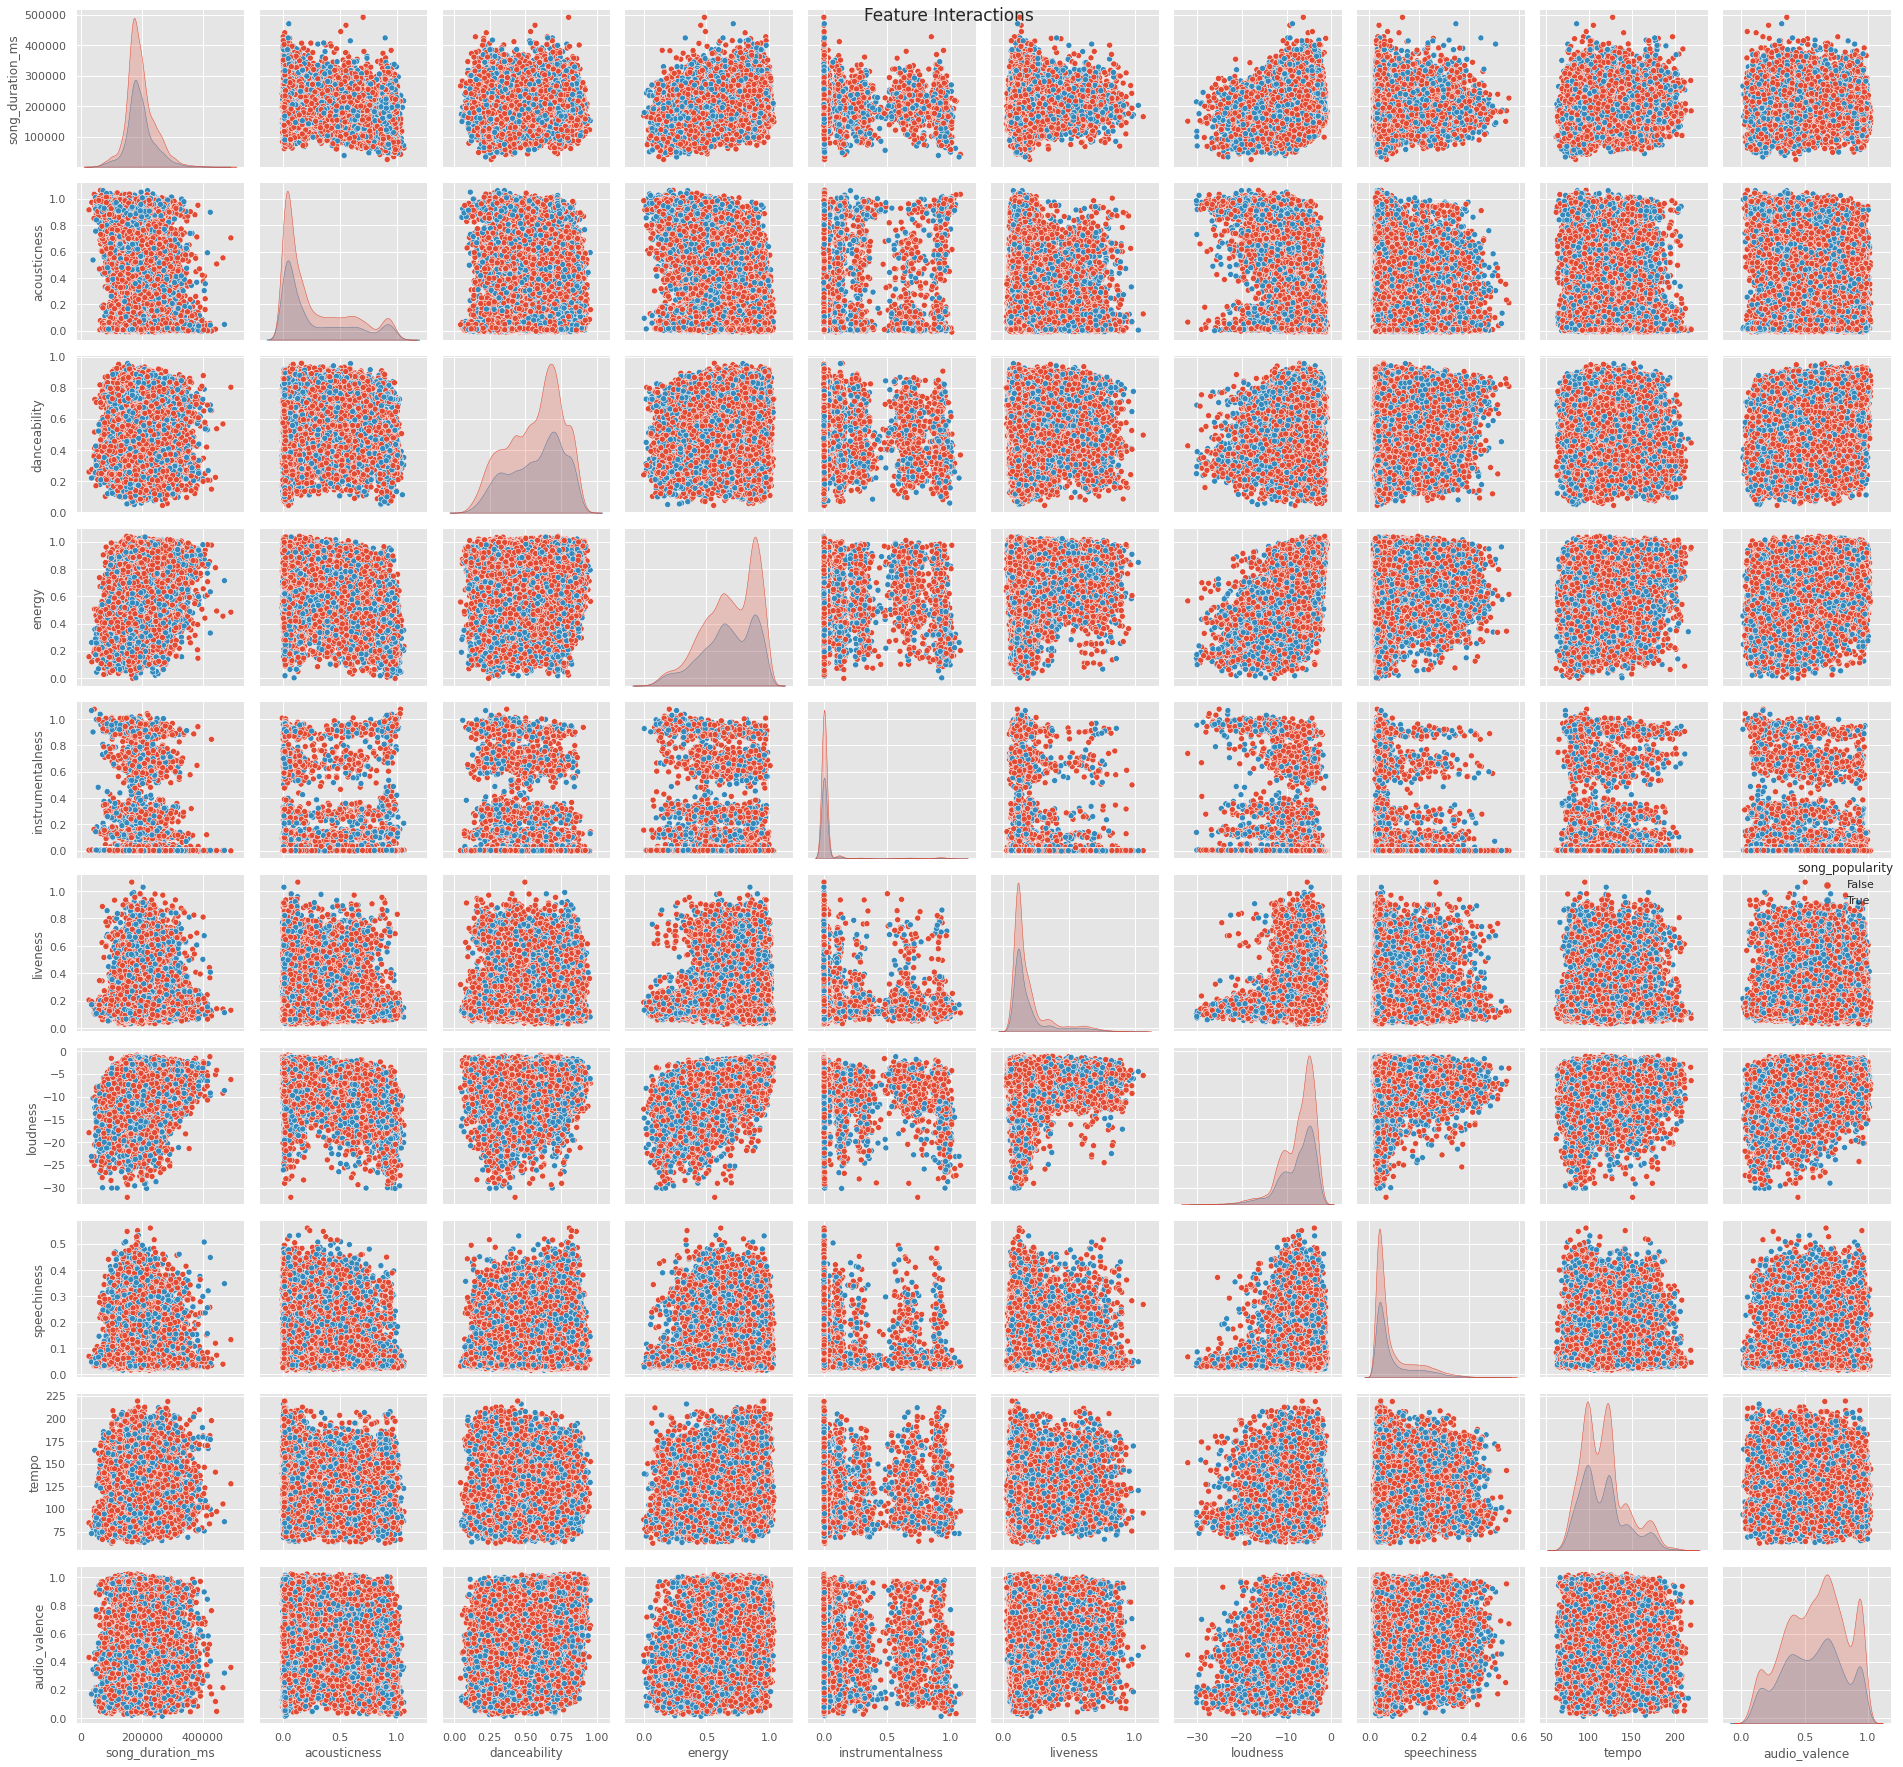

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 20))
sns.pairplot(data=train, hue='song_popularity', vars=num_cols)
plt.suptitle('Feature Interactions', fontsize=17)
plt.tight_layout()
plt.show()

**Findings**
- Data is not linearly separable.